In [1]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.2 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 138.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 174.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=cf7a0d2232f2f5d93dd66913b4937b8a553c132b0246f1caf06fe8f98f4517cd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.7 MB/s eta 0:00:00
   ━━━━━

In [2]:
import yfinance as yf
import pandas as pd

Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-06-13 08:52:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.1’

apple.json.1        100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-06-13 08:52:49 (458 MB/s) - ‘apple.json.1’ saved [5699/5699]



Using the attribute  `info` we can extract information about the stock as a Python dictionary.

In [5]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the `country` using the key country


In [6]:
apple_info['country']

'United States'

Extracting Share Price

Using the `history()` method we can get the share price of the stock over a certain period of time. Using the `period parameter` we can set how far back from the present to get data. 

In [7]:
apple_share_price_data = apple.history(period="max")

In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.0,0.0


Resetting the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [9]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

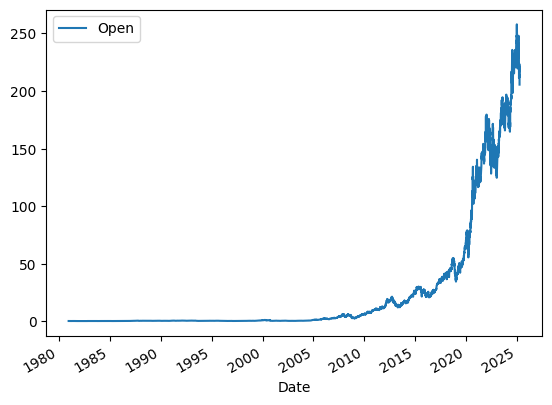

In [10]:
apple_share_price_data.plot(x="Date", y="Open")

Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [11]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
Name: Dividends, Length: 86, dtype: float64

We can plot the dividends overtime:


<Axes: xlabel='Date'>

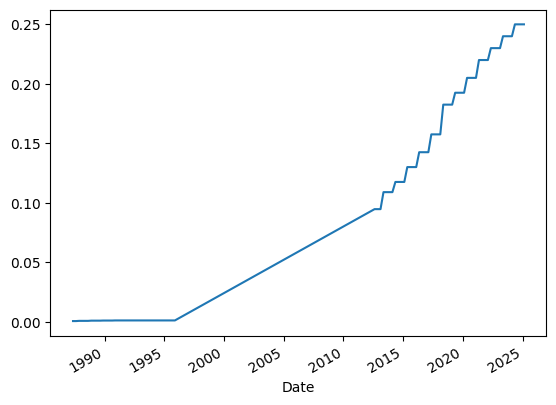

In [12]:
apple.dividends.plot()

Using the `Ticker` module we can create an object for AMD (Advanced Micro Devices) with the ticker symbol `AMD` that will allow us to access functions to extract data. 

In [38]:
amd = yf.Ticker("AMD")

In [39]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-04-04 00:15:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.2’

amd.json.2          100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-04-04 00:15:47 (554 MB/s) - ‘amd.json.2’ saved [5838/5838]



In [40]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

Using the key 'country' to find the country the stock belongs to

In [41]:
amd_info['country']

'United States'

Using the key 'sector' to find the sector the stock belongs to

In [42]:
amd_info['sector']

'Technology'

Obtaining stock data for AMD using the `history` function and setting the `period` to max, the `Volume` traded on the first day (first row) is;


In [47]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.head()
amd_share_price_data[['Volume']]

,Volume
Date,
1980-03-17 00:00:00-05:00,219600
1980-03-18 00:00:00-05:00,727200
1980-03-19 00:00:00-05:00,295200
1980-03-20 00:00:00-05:00,159600
1980-03-21 00:00:00-05:00,130800
...,...
2025-03-28 00:00:00-04:00,31069100
2025-03-31 00:00:00-04:00,30865300
2025-04-01 00:00:00-04:00,23523200
